### stroke 1

In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.warn("ignore")
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression

theme_colors = ['#E9EAEC', '#FAD02C', '#90ADC6', '#333652']

C:\Users\samcs\AppData\Local\Temp\ipykernel_2864\1478233631.py:6: UserWarning:

ignore



In [430]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [431]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [505]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [506]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


## Data Visualization

In [432]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

fig = go.Figure(
    data=go.Surface(z=df.values),
    layout=go.Layout(
        title="Stroke",
        width=500,
        height=500,
    ))

for template in ["plotly_dark", "ggplot2"]:
    fig.update_layout(template=template, title="Stroke: '%s' theme" % template)
    fig.show()

In [465]:
fig = px.pie(df, values=df.isnull().sum(), names=df.columns, title='smoking status',width=700,height=700)
fig.show()


print("misssing values")
print("================")
print(df.isnull().sum())

misssing values
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


### stroke 2

In [452]:
fig = px.pie(df, values=df['smoking_status'].value_counts(), names=["never smoked","Unknown","formerly smoked","smokes"], title='smoking status',width=700,height=700)
fig.show()

print("somking value counts")
print("====================")
print(df['smoking_status'].value_counts())

somking value counts
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [459]:
fig = px.bar(df, x=df['work_type'].value_counts(), y=['Private',         
'Self-employed ',    
'children'  ,        
'Govt_job',          
'Never_worked' ])
fig.show()

print("work type counts")
print("====================")
print(df['work_type'].value_counts())

work type counts
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


stroke value counts
0    4861
1     249
Name: stroke, dtype: int64


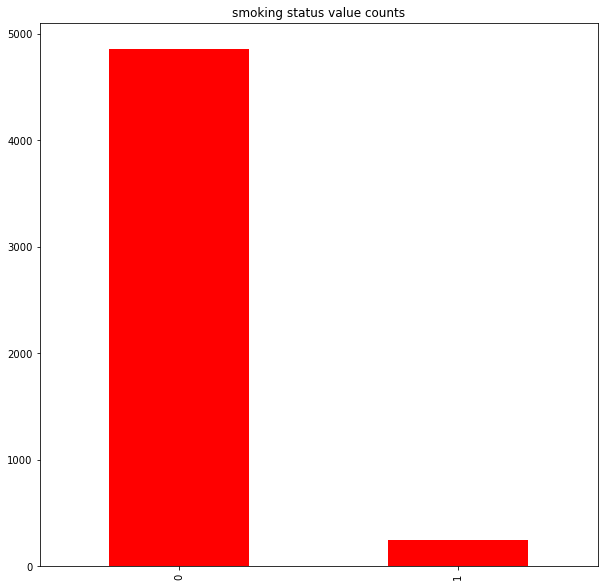

In [291]:
plt.figure(figsize=(10,10))
df['stroke'].value_counts().plot(kind='bar',title="smoking status value counts",color='red')
print("stroke value counts")
print("====================")
print(df['stroke'].value_counts())

In [462]:
fig = px.pie(df, values=df['ever_married'].value_counts(), names=['Yes','No'], title='married value counts',width=700,height=700)
fig.show()
print("married value counts")
print("====================")
print(df['ever_married'].value_counts())

married value counts
Yes    3353
No     1757
Name: ever_married, dtype: int64


In [468]:
fig = px.bar(df, x=df['gender'].value_counts(), y=['Female','Male','Other'])
fig.show()
print("Gender value counts")
print("====================")
print(df['gender'].value_counts())

Gender value counts
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


C:\Users\samcs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



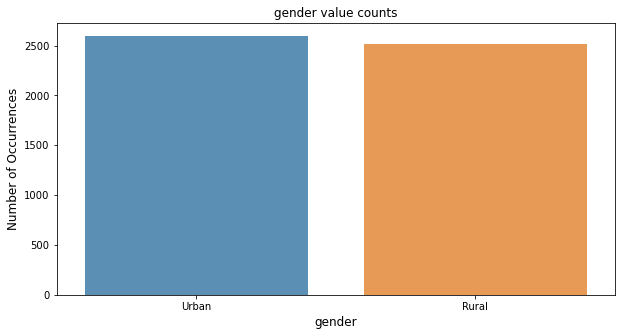

In [295]:
Residence_type  = df['Residence_type'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(Residence_type.index, Residence_type.values, alpha=0.8)
plt.title('gender value counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('gender', fontsize=12)
plt.show()

In [296]:
gender = df.groupby(['gender']).size().reset_index().rename(columns={0: 'count'})
hypertension = df.groupby(['hypertension']).size().reset_index().rename(columns={0: 'count'})
heart_disease = df.groupby(['heart_disease']).size().reset_index().rename(columns={0: 'count'})
ever_married = df.groupby(['ever_married']).size().reset_index().rename(columns={0: 'count'})
work_type = df.groupby(['work_type']).size().reset_index().rename(columns={0: 'count'})
residence_type = df.groupby(['Residence_type']).size().reset_index().rename(columns={0: 'count'})
smoking_status = df.groupby(['smoking_status']).size().reset_index().rename(columns={0: 'count'})
stroke = df.groupby(['stroke']).size().reset_index().rename(columns={0: 'count'})

fig = make_subplots(rows=4, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]
                          ])

## Gender Donut Chart
fig.add_trace(
    go.Pie(
        labels=gender['gender'],
        values=gender['count'],
        hole=.6,
        title='Gender',
        titlefont={'color':'green', 'size': 24},       
        ),
    row=1,col=1
    )

## hypertension Donut Chart
fig.add_trace(
    go.Pie(
        labels=hypertension['hypertension'],
        values=hypertension['count'],
        hole=.6,
        title='Hypertension',
        titlefont={'color':'red', 'size': 24},
        ),
    row=1,col=2
    )

## heart_disease Donut Chart
fig.add_trace(
    go.Pie(
        labels=heart_disease['heart_disease'],
        values=heart_disease['count'],
        hole=.6,
        title='Heart Disease',
        titlefont={'color':'blue', 'size': 24},
        ),
    row=2,col=1
    )


## ever_married Donut Chart
fig.add_trace(
    go.Pie(
        labels=ever_married['ever_married'],
        values=ever_married['count'],
        hole=.6,
        title='Ever Married',
        titlefont={'color':'yellow', 'size': 24},
        ),
    row=2,col=2
    )

## work_type Donut Chart
fig.add_trace(
    go.Pie(
        labels=work_type['work_type'],
        values=work_type['count'],
        hole=.6,
        title='Work Type',
        titlefont={'color':'blanchedalmond', 'size': 24},
        ),
    row=3,col=1
    )

## residence_type Donut Chart
fig.add_trace(
    go.Pie(
        labels=residence_type['Residence_type'],
        values=residence_type['count'],
        hole=.6,
        title='Residence Type',
        titlefont={'color':'pink', 'size': 24},
        ),
    row=3,col=2
    )

## smoking_status Donut Chart
fig.add_trace(
    go.Pie(
        labels=smoking_status['smoking_status'],
        values=smoking_status['count'],
        hole=.6,
        title='Smoking Status',
        titlefont={'color':'sienna', 'size': 24},
        ),
    row=4,col=1
    )

## stroke Donut Chart
fig.add_trace(
    go.Pie(
        labels=stroke['stroke'],
        values=stroke['count'],
        hole=.6,
        title='Stroke',
        titlefont={'color':None, 'size': 24},
        ),
    row=4,col=2
    )

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
#         colors=theme_colors,
        line=dict(color='#EEEEEE',
                  width=2)
        )
    )


fig.layout.update(title="<b> Categorical Features<b>",
                  titlefont={'color':None, 'size': 24, 'family': 'Courier New'},
                  showlegend=False, 
                  height=1200, 
                  width=1000,
                  template=None,
                  title_x=0.5
                  )
fig.show()

In [297]:
stroke = df[df['stroke'] == 1]
no_stroke = df[df['stroke'] == 0]

fig=make_subplots(rows=2,cols=1,subplot_titles=('<i>Age', '<i>Avg Glucose Level'))

fig.add_trace(go.Box(y=stroke['age'], name='stroke'),row=1,col=1)
fig.add_trace(go.Box(y=no_stroke['age'], name='no_stroke'),row=1,col=1)

fig.add_trace(go.Box(y=stroke['avg_glucose_level'],name='stroke'),row=2,col=1)
fig.add_trace(go.Box(y=no_stroke['avg_glucose_level'],name='no_stroke'),row=2,col=1)


fig.update_layout(height=800, width=1000, title_text='<b>Box Plots', font_size=20, showlegend=False)
fig.update_layout( title_x=0.5, font_family='Courier New')

In [298]:
color_palette = ['#FFFCFE', '#B6E2D3', '#D8F9B1']

corr = df.corr()
fig = go.Figure(data= go.Heatmap(z=corr,
                                 x=corr.index.values,
                                 y=corr.columns.values,
                                 colorscale='portland',
                                 text = corr.round(2), texttemplate="%{text}", xgap=3, ygap=3
                                 )
                )

fig.update_layout(title_text='<b>Correlation Matrix<b>',
                  title_x=0.5,
                  titlefont={'size': 24, 'family': 'Courier New'},
                  width=900, height=600,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed', 
                  paper_bgcolor=None,
                  template='simple_white'
                  )

fig.show()

### stroke 3

## Handling missing values

In [299]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [300]:
df.drop('id',axis=1,inplace=True)

## Handling Categorical Features

In [301]:
df['ever_married'].replace(('Yes','No'),(1,0),inplace=True)

In [302]:
df['gender'].replace(('Male','Female','Other'),(0,1,2),inplace=True)

In [303]:
df['Residence_type'].replace(('Urban','Rural'),(1,0),inplace=True)

In [304]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['work_type']=encoder.fit_transform(df['work_type'])

In [305]:
df['smoking_status']=encoder.fit_transform(df['smoking_status'])

In [306]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [307]:
df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int32
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [308]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [309]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,2,1,228.69,36.600000,1
1,1,61.0,0,0,1,3,0,202.21,28.893237,2
2,0,80.0,0,1,1,2,0,105.92,32.500000,2
3,1,49.0,0,0,1,2,1,171.23,34.400000,3
4,1,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,2,1,83.75,28.893237,2
5106,1,81.0,0,0,1,3,1,125.20,40.000000,2
5107,1,35.0,0,0,1,3,0,82.99,30.600000,2
5108,0,51.0,0,0,1,2,0,166.29,25.600000,1


In [310]:
df['gender'].value_counts()

1    2994
0    2115
2       1
Name: gender, dtype: int64

## model building

In [311]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## RandomForestClassifier

In [312]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [361]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [362]:
y_pred=classifier.predict(x_test)

In [363]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [364]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
random_accuracy=accuracy_score(y_test,y_pred)

In [365]:
print(random_accuracy)

0.9491392801251957


In [500]:
fig = px.imshow(confusion_matrix(y_test,y_pred),text_auto=True,title="RandomForest confusion matrix",labels=dict(x="Predicted Label", y="True Label", color="Productivity"),
                x=['False', 'True'],
                y=['False', 'True'],template='presentation'
               )
fig.show()

## DecisionTree Classifier

In [356]:
from sklearn.tree import DecisionTreeClassifier
Decision_classifier=DecisionTreeClassifier()
Decision_classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [357]:
y_pred=Decision_classifier.predict(x_test)

In [358]:
from sklearn.metrics import confusion_matrix,accuracy_score
decision_accuracy=accuracy_score(y_test,y_pred)

In [359]:
print(decision_accuracy)

0.9061032863849765


In [502]:
fig = px.imshow(confusion_matrix(y_test,y_pred),text_auto=True,title="Decision Tree confusion matrix",labels=dict(x="Predicted Label", y="True Label", color="Productivity"),
                x=['False', 'True'],
                y=['False', 'True'],template='ygridoff'
               )
fig.show()

## SVM

In [350]:
from sklearn.svm import SVC
SVC_classifier=SVC()
SVC_classifier.fit(x_train,y_train)

SVC()

In [351]:
y_pred=SVC_classifier.predict(x_test)

In [352]:
from sklearn.metrics import confusion_matrix,accuracy_score
svm_accuracy=accuracy_score(y_test,y_pred)

In [353]:
svm_accuracy

0.9491392801251957

In [492]:
fig = px.imshow(confusion_matrix(y_test,y_pred),text_auto=True,title="SVM confusion matrix",labels=dict(x="Predicted Label", y="True Label", color="Productivity"),
                x=['False', 'True'],
                y=['False', 'True'],template='plotly_dark'
                
               )
fig.show()

## logistic regression

In [323]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(x_train,y_train)

C:\Users\samcs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [324]:
y_pred=log_classifier.predict(x_test)

In [345]:
from sklearn.metrics import confusion_matrix,accuracy_score
log_accuracy=accuracy_score(y_test,y_pred)

In [499]:
fig = px.imshow(confusion_matrix(y_test,y_pred),text_auto=True,title="Logistic confusion matrix",labels=dict(x="Predicted Label", y="True Label", color="Productivity"),
                x=['False', 'True'],
                y=['False', 'True'],template='seaborn',
               )
fig.show()

## KNN

In [482]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [483]:
y_pred=knn_classifier.predict(x_test)

In [484]:
from sklearn.metrics import confusion_matrix,accuracy_score
knn_accuracy=accuracy_score(y_test,y_pred)

In [495]:
fig = px.imshow(confusion_matrix(y_test,y_pred),text_auto=True,title="KNN confusion matrix",labels=dict(x="Predicted Label", y="True Label", color="Productivity"),
                x=['False', 'True'],
                y=['False', 'True'],template='ggplot2'
               )
fig.show()

### stroke-4

In [394]:
algorithms={'algorithms':['RandomForest','DecisionTree','SVM','Logistic','KNN'],
           'accuracy':[random_accuracy,decision_accuracy,svm_accuracy,log_accuracy,knn_accuracy]
           }

In [396]:
accuracy_df=pd.DataFrame(algorithms)

In [402]:
accuracy_df

,algorithms,accuracy
0,RandomForest,0.949139
1,DecisionTree,0.906103
2,SVM,0.949139
3,Logistic,0.949139
4,KNN,0.943662


In [503]:
accuracy_df.to_csv('accracy.csv', index=False)

In [426]:
plt.figure(figsize=(10,10))
fig = px.pie(accuracy_df, values='accuracy', names='algorithms', title='Models accuracy score')
fig.show()

<Figure size 720x720 with 0 Axes>

In [423]:
fig = px.bar(accuracy_df, x='algorithms', y='accuracy',color='accuracy')
fig.show()

In [334]:

def prediction():
    app=['gender_input', 'age_input', 'hypertension_input', 'heart_disease_input', 'ever_married_input',
       'work_type_input', 'Residence_type_input', 'avg_glucose_level_input', 'bmi_input',
       'smoking_status_input']

    for i in app:
        if i=='gender_input':
            gender_input=input("please enter your gender_input")
            if gender_input.lower()=='male' or 'men':
                gender_input=0
            elif gender_input.lower=='female' or 'women':
                gender_input=1
            else:
                gender_input=2
        elif i=="age_input":
            age_input=int(input("please enter your age_input"))
            if age_input<=0 or age_input>=100:
                age_input=int(input("invalid age_input please enter your age_input"))

        elif i=="hypertension_input":
            hypertension_input=input("please enter the hypertension_input details")
            if hypertension_input.lower()=='yes':
                hypertension_input=1
            elif hypertension_input.lower()=='no':
                hypertension_input=0
            else:
                hypertension_input=input("please enter the hypertension_input details")

        elif i=="heart_disease_input":
            heart_disease_input=input("do you have a heart disease?")
            if heart_disease_input.lower()=='yes':
                heart_disease_input=1
            elif heart_disease_input.lower()=='no':
                heart_disease_input=0
            else:
                heart_disease_input=input("do you have a heart disease?")

        elif i=="ever_married_input":
            ever_married_input=input("are you married?")
            if ever_married_input.lower()=='yes':
                ever_married_input=1
            elif ever_married_input.lower()=='no':
                ever_married_input=0
            else:
                ever_married_input=input("are you married?")

        elif i=="work_type_input":
            work_type_input=input("please enter the work type 'children, Govt_jov, Never_worked, Private or Self-employed'")
            if work_type_input.lower()=='private':
                work_type_input=2
            elif work_type_input.lower()=='self employed':
                work_type_input=3
            elif work_type_input.lower()=='children':
                work_type_input=4
            elif work_type_input.lower()=='govt job':
                work_type_input=3
            else:
                work_type_input=1

        elif i=="Residence_type_input":
            Residence_type_input=input("please enter your Residence type?")
            if Residence_type_input.lower()=='rural':
                Residence_type_input=1
            elif Residence_type_input.lower()=='urban':
                Residence_type_input=0
            else:
                Residence_type_input=input("please enter your Residence type?")

        elif i=="avg_glucose_level_input":
            avg_glucose_level_input=int(input("please enter your avg glucose level?"))
            while type(avg_glucose_level_input)==str:
                avg_glucose_level_input=input("please enter your avg_glucose_level_input?")

        elif i=="bmi_input":
            bmi_input=int(input("please enter your bmi_input ?"))
            while type(bmi_input)==str:
                bmi_input=input("please enter your bmi_input?")

        elif i=="smoking_status_input":
            smoking_status_input=input("are you smoking?")
            if smoking_status_input.lower()=='yes':
                smoking_status_input=1
            elif smoking_status_input.lower()=='no':
                smoking_status_input=0
            else:
                smoking_status_input=input("are you smoking?")
                
                
    result_=[[gender_input, age_input, hypertension_input, heart_disease_input, ever_married_input,
       work_type_input, Residence_type_input, avg_glucose_level_input, bmi_input,
       smoking_status_input]]
    
    print(result_)
    
    pred_result=classifier.predict(result_)
    
    if pred_result[0]==0:
        return "you don't have a stroke attack"
    else:
        return "you have a stroke please visit the doctor"
    

In [338]:
prediction()

please enter your gender_inputmale
please enter your age_input67
please enter the hypertension_input detailsno
do you have a heart disease?yes
are you married?yes
please enter the work type 'children, Govt_jov, Never_worked, Private or Self-employed'private
please enter your Residence type?rural
please enter your avg glucose level?228
please enter your bmi_input ?36
are you smoking?yes
[[0, 67, 0, 1, 1, 2, 1, 228, 36, 1]]


C:\Users\samcs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



'you have a stroke please visit the doctor'